# Wolt Courier partners online prediction model
**By: Alexander Ayupov**,
**30.01.2024**,
**v.1.0**

For this project I will be working on dataset from [Kaggle](https://github.com/woltapp/data-science-internship-2024/blob/main/daily_cp_activity_dataset.csv). 

**Dataset includes following columns:** 'date', 'courier_partners_online', 'temperature', 'relative_humidity','precipitation'.

**Target variable to predict: courier_partners_online**

Project includes:

* Data exploration
* Fearure engineering
* Data plotting/viz
* Working with dummy variables and data scaling
* Build Linear regression 
* Build Neural network Keras model
* Save the model

## Import Libraries

In [977]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [979]:
url = 'https://raw.githubusercontent.com/woltapp/data-science-internship-2024/main/daily_cp_activity_dataset.csv'
df = pd.read_csv(url)
df.head(5)

,date,courier_partners_online,temperature,relative_humidity,precipitation
0,2021-05-01,49,18.27,0.57,0.0
1,2021-05-02,927,19.88,0.55,0.0
2,2021-05-03,40,16.88,0.60,0.0
3,2021-05-04,51,21.88,0.53,0.0
4,2021-05-05,50,21.11,0.54,0.0


## Data Exploration

In [981]:
df.columns

Index(['date', 'courier_partners_online', 'temperature', 'relative_humidity',
       'precipitation'],
      dtype='object')

In [982]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 0 to 760
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     761 non-null    object 
 1   courier_partners_online  761 non-null    int64  
 2   temperature              731 non-null    float64
 3   relative_humidity        761 non-null    float64
 4   precipitation            756 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 29.9+ KB


In [983]:
df.describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,761.000000,731.000000,761.000000,756.000000
mean,72.417871,17.532585,0.653193,0.914735
std,96.039679,10.007564,0.171553,1.749988
min,34.000000,-9.980000,0.430000,0.000000
25%,58.000000,10.930000,0.520000,0.000000
50%,66.000000,18.630000,0.590000,0.000000
75%,72.000000,24.410000,0.790000,0.910000
max,1506.000000,37.950000,1.000000,12.900000


In [5]:
df['date'].sort_values()

0      2021-05-01
1      2021-05-02
2      2021-05-03
3      2021-05-04
4      2021-05-05
          ...    
756    2023-05-27
757    2023-05-28
758    2023-05-29
759    2023-05-30
760    2023-05-31
Name: date, Length: 761, dtype: object

In [985]:
df_corr = df.corr(numeric_only=True) 
#Creating correlation df to see how features correlate each other and target variable: courier_partners_online

<Axes: >

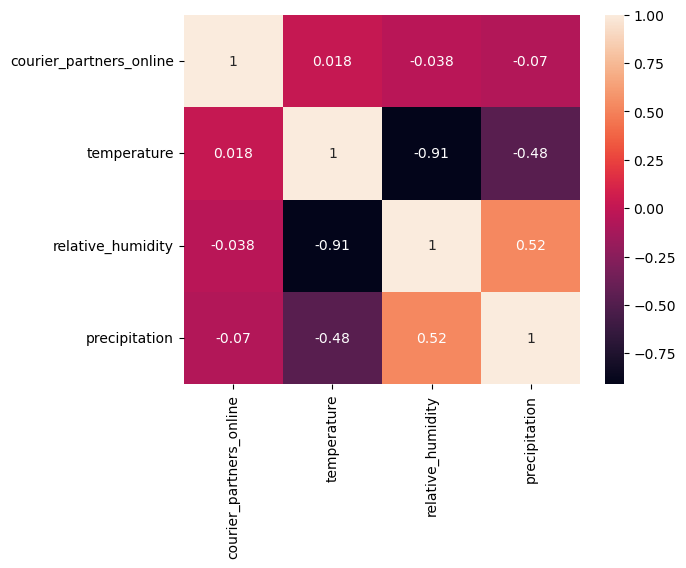

In [986]:
sns.heatmap(df_corr, annot=True)

## Feature Engineering
**Split date feature into: year,month,day**

In [987]:
df['date'] = pd.to_datetime(df['date'])

In [988]:
df['year']=df['date'].apply(lambda date:date.year)

In [989]:
df['month']=df['date'].apply(lambda date:date.month)

In [990]:
df['Day'] = df['date'].apply(lambda date: date.dayofweek)

In [991]:
df['Day of Week'] = df['date'].apply(lambda date: date.dayofweek)

In [992]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [993]:
df['Day of Week'] = df['Day of Week'].map(dmap)

In [994]:
df.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
0,2021-05-01,49,18.27,0.57,0.0,2021,5,5,Sat
1,2021-05-02,927,19.88,0.55,0.0,2021,5,6,Sun
2,2021-05-03,40,16.88,0.60,0.0,2021,5,0,Mon
3,2021-05-04,51,21.88,0.53,0.0,2021,5,1,Tue
4,2021-05-05,50,21.11,0.54,0.0,2021,5,2,Wed


In [995]:
df['year'].unique()

array([2021, 2022, 2023], dtype=int64)

In [997]:
df['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [998]:
df['Day'].unique()

array([5, 6, 0, 1, 2, 3, 4], dtype=int64)

## Continuing Data Exploration

In [999]:
df_couriers = df[df['courier_partners_online'] <= 100] # Eliminating outliers with extreme values
df_couriers

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
0,2021-05-01,49,18.27,0.57,0.00,2021,5,5,Sat
2,2021-05-03,40,16.88,0.60,0.00,2021,5,0,Mon
3,2021-05-04,51,21.88,0.53,0.00,2021,5,1,Tue
4,2021-05-05,50,21.11,0.54,0.00,2021,5,2,Wed
5,2021-05-06,47,19.04,0.56,0.00,2021,5,3,Thu
...,...,...,...,...,...,...,...,...,...
756,2023-05-27,70,19.22,0.56,0.00,2023,5,5,Sat
757,2023-05-28,76,27.26,0.64,0.41,2023,5,6,Sun
758,2023-05-29,73,NaN,0.62,0.80,2023,5,0,Mon
759,2023-05-30,81,18.35,0.57,0.00,2023,5,1,Tue


In [1000]:
df_outliers = df[df['courier_partners_online'] > 100] #check extreme outliers values
df_outliers

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
1,2021-05-02,927,19.88,0.55,0.00,2021,5,6,Sun
138,2021-09-16,1367,30.68,0.46,0.00,2021,9,3,Thu
269,2022-01-25,1176,-2.61,0.92,0.84,2022,1,1,Tue
326,2022-03-23,1506,NaN,0.55,0.00,2022,3,2,Wed
635,2023-01-26,1175,-1.88,0.92,0.85,2023,1,3,Thu


In [1001]:
df_couriers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 756 entries, 0 to 760
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     756 non-null    datetime64[ns]
 1   courier_partners_online  756 non-null    int64         
 2   temperature              727 non-null    float64       
 3   relative_humidity        756 non-null    float64       
 4   precipitation            751 non-null    float64       
 5   year                     756 non-null    int64         
 6   month                    756 non-null    int64         
 7   Day                      756 non-null    int64         
 8   Day of Week              756 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(1)
memory usage: 59.1+ KB


<Axes: >

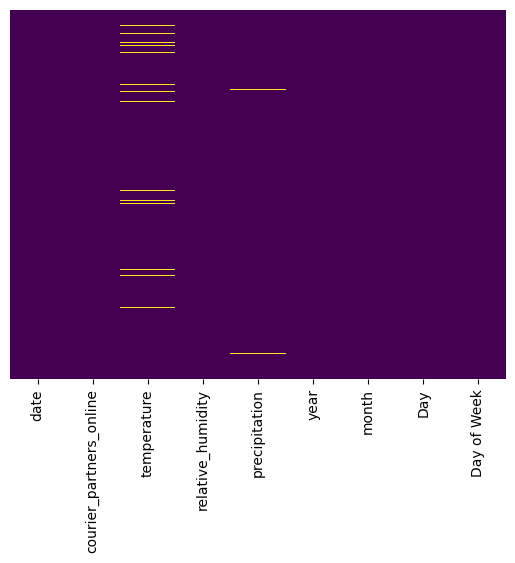

In [1002]:
sns.heatmap(df_couriers.isnull(), yticklabels= False, cbar=False, cmap='viridis')  
#Check for missing values.
#Here we see Temperature and Precipitation features have missing values.

<Axes: xlabel='courier_partners_online', ylabel='Count'>

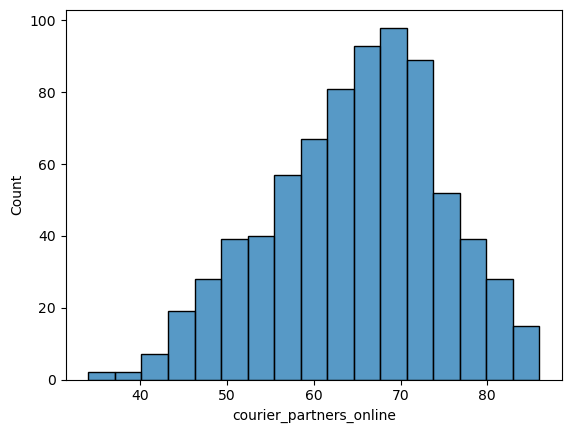

In [1027]:
sns.histplot(df_couriers['courier_partners_online']) 
#Checking the distribution of the column we are about to predict. 
#Target column distribution is more or less normal, so keep going.

<Axes: >

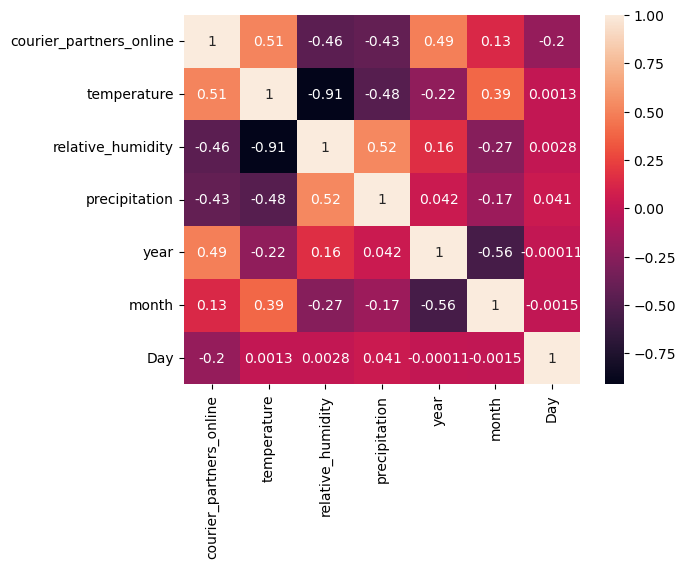

In [1032]:
corr_couriers = df_couriers.corr(numeric_only=True)
sns.heatmap(corr_couriers, annot=True)
# Another correlation heatmap after Feature engineering 
# Aere we see positively and negatively correlated features against the target column
# There are no features which could be possible a perfect predictor for our target couriers_parter_online column
# So we are continuing exploration with plotting data features, based on correlation figures

In [1031]:
df_couriers.describe()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day
count,756,756.000000,727.000000,756.000000,751.000000,756.000000,756.000000,756.000000
mean,2022-05-16 16:51:25.714285568,64.760582,17.565681,0.653016,0.918575,2021.876984,6.481481,2.998677
min,2021-05-01 00:00:00,34.000000,-9.980000,0.430000,0.000000,2021.000000,1.000000,0.000000
25%,2021-11-07 18:00:00,58.000000,11.040000,0.520000,0.000000,2021.000000,4.000000,1.000000
50%,2022-05-17 12:00:00,66.000000,18.630000,0.590000,0.000000,2022.000000,6.000000,3.000000
75%,2022-11-22 06:00:00,72.000000,24.410000,0.790000,0.915000,2022.000000,9.000000,5.000000
max,2023-05-31 00:00:00,86.000000,37.950000,1.000000,12.900000,2023.000000,12.000000,6.000000
std,NaN,9.672222,9.968873,0.171345,1.754850,0.710899,3.388086,2.005621


### Exploring courier_partners_online mean values/values distribution, against year/month/Day columns

The main goal here is to check how courier partners online values are distributed agains year, month and day for sake of future predictive model.

### Year 

Year data has some limitations: 
* Year 2021 represents data only from May-Dec
* Year 2023 represents data only from Jan-May

<Axes: xlabel='year', ylabel='courier_partners_online'>

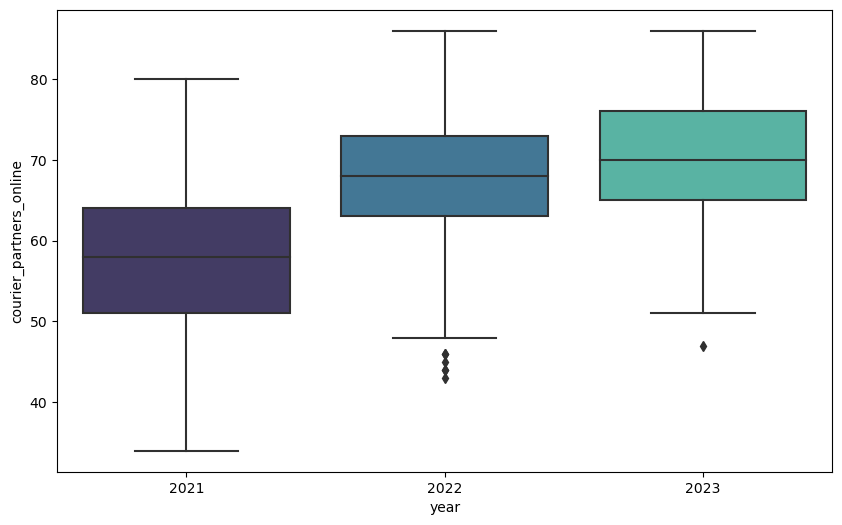

In [1008]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='courier_partners_online', data=df_couriers,palette='mako') 

In [1010]:
import plotly.express as px
fig = px.box(df_couriers, x="year", y="courier_partners_online")
fig.show()
#Using plotly library we can clearly median and quartiles 

In [1011]:
df_couriers_YearMean = pd.DataFrame(df_couriers.groupby('year')['courier_partners_online'].mean())
df_couriers_YearMean

,courier_partners_online
year,
2021,57.440329
2022,67.617080
2023,69.706667


In [1012]:
df_couriers_YearMean=df_couriers_mean.reset_index()

In [1013]:
df_couriers_mean.rename(columns={'courier_partners_online':'couriers_online_mean'}, inplace=True)

[Text(0, 0, '57.4403'), Text(0, 0, '67.6171'), Text(0, 0, '69.7067')]

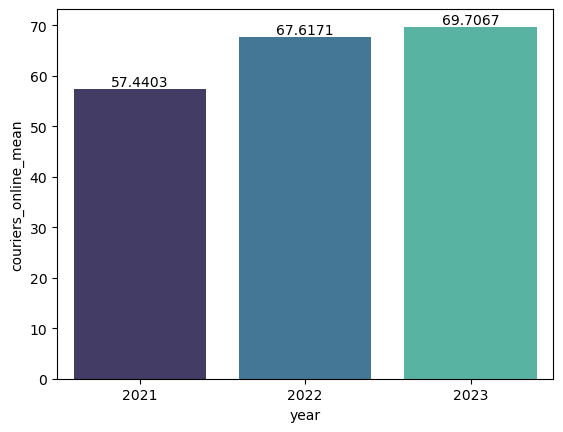

In [1014]:
ax = sns.barplot(x='year',y='couriers_online_mean',data=df_couriers_mean, palette='mako')
ax.bar_label(ax.containers[0])
#plt.legend(df_couriers_mean['couriers_online_mean'],bbox_to_anchor=(1.05, 1.0), loc='upper left')

### Month

In [1022]:
df_couriers_MonthMean = pd.DataFrame(df_couriers.groupby('month')['courier_partners_online'].mean())
df_couriers_MonthMean

,courier_partners_online
month,
1,55.483333
2,62.267857
3,70.557377
4,72.450000
5,63.391304
6,56.900000
7,59.758065
8,67.161290
9,71.016949


<Axes: xlabel='month', ylabel='courier_partners_online'>

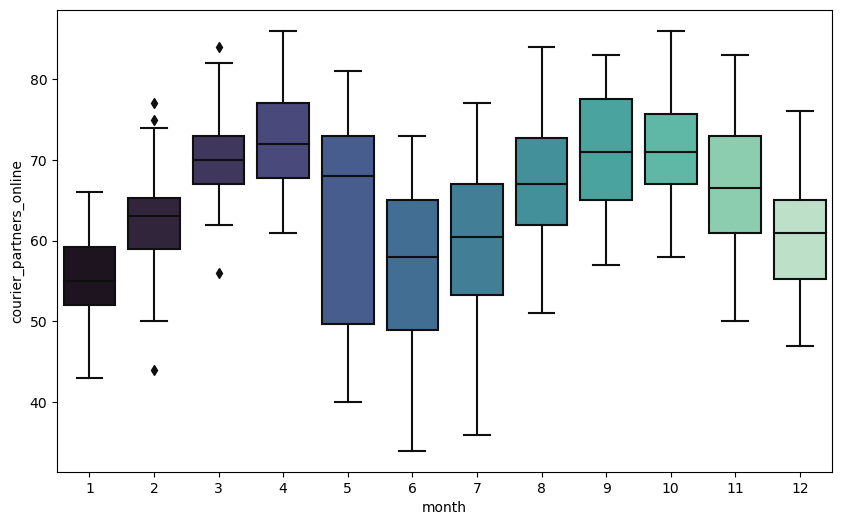

In [1023]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='month', y='courier_partners_online', data=df_couriers,palette='mako') 

In [1016]:
import plotly.express as px
fig = px.box(df_couriers, x="month", y="courier_partners_online")
fig.show()

<Axes: xlabel='month'>

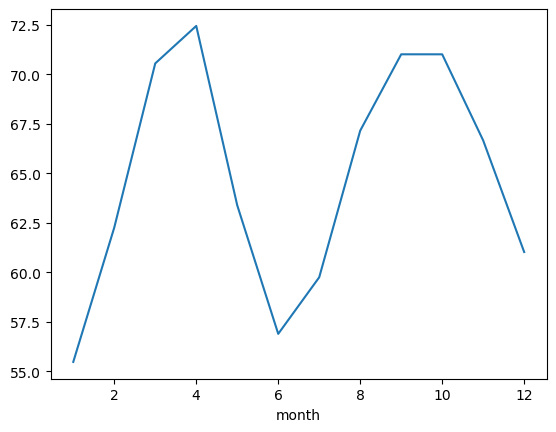

In [1017]:
df_couriers.groupby('month')['courier_partners_online'].mean().plot()

### Day

In [1295]:
df_couriers_DayMean = pd.DataFrame(df_couriers.groupby('Day')['courier_partners_online'].mean())
df_couriers_DayMean
#{0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

,courier_partners_online
Day,
0,64.980952
1,68.696078
2,69.558824
3,64.679612
4,60.367925
5,60.798077
6,64.460000


<Axes: xlabel='Day'>

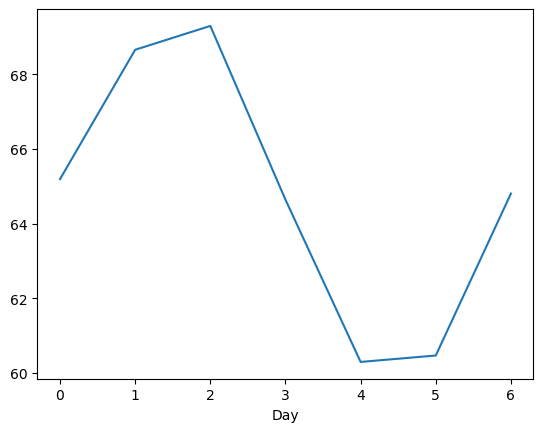

In [1033]:
df_couriers.groupby('Day')['courier_partners_online'].mean().plot()
#{0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

<Axes: xlabel='Day', ylabel='courier_partners_online'>

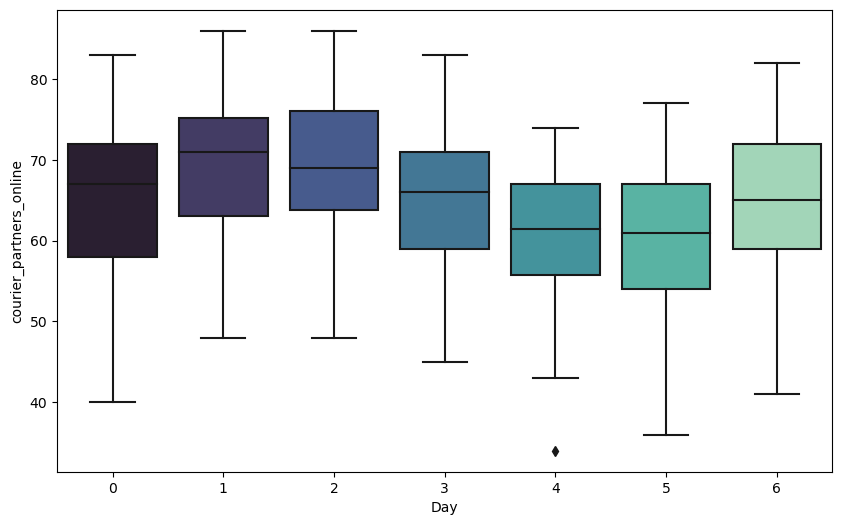

In [1037]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day', y='courier_partners_online', data=df_couriers,palette='mako') 

In [1038]:
import plotly.express as px
fig = px.box(df_couriers, x="Day", y="courier_partners_online")
fig.show()

### Plotting data features choosen based on above correlation heatmap: Temperature, Relative humidity, Precipitation

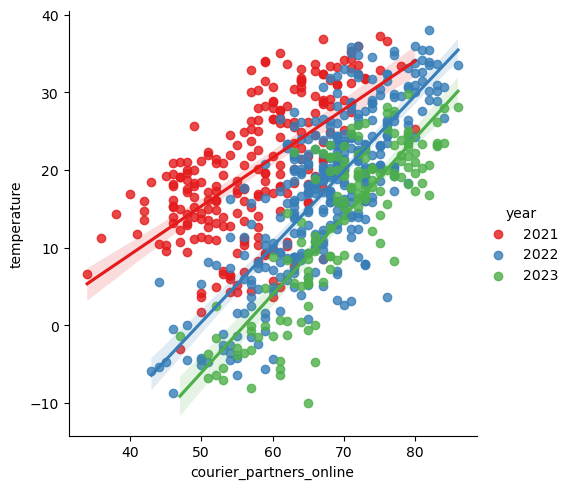

In [1064]:
sns.lmplot(x='courier_partners_online',y='temperature',data=df_couriers, hue='year', palette='Set1')

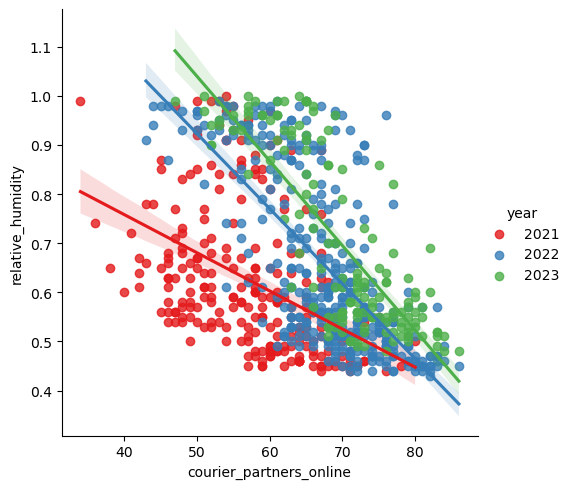

In [1052]:
sns.lmplot(x='courier_partners_online',y='relative_humidity',data=df_couriers, hue='year', palette='Set1')

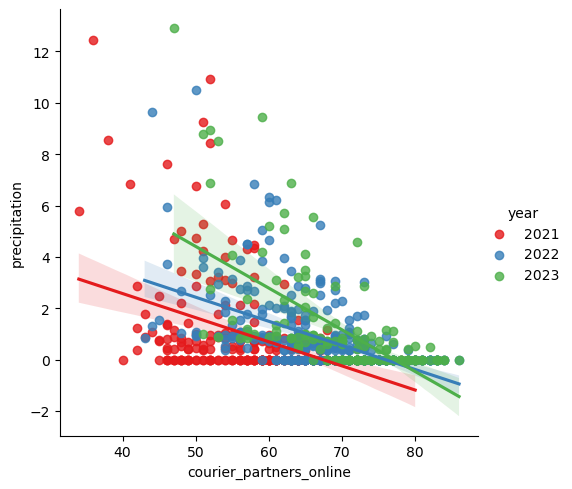

In [1066]:
sns.lmplot(x='courier_partners_online',y='precipitation',data=df_couriers, hue='year', palette='Set1')

### Pivot data.  Motnh as index column. Heatmap plot

In [1146]:
dfPivot = df_couriers.pivot_table(index=['month'], columns=['year'], values=['courier_partners_online'], aggfunc='sum') 
dfPivot.head(12)

courier_partners_online                
year                     2021    2022    2023
month                                        
1                         NaN  1590.0  1739.0
2                         NaN  1643.0  1844.0
3                         NaN  2010.0  2294.0
4                         NaN  2055.0  2292.0
5                      1424.0  2121.0  2287.0
6                      1465.0  1949.0     NaN
7                      1648.0  2057.0     NaN
8                      1894.0  2270.0     NaN
9                      1894.0  2296.0     NaN
10                     2052.0  2351.0     NaN
11                     1840.0  2160.0     NaN
12                     1741.0  2043.0     NaN

* Well, I know that imputing NA variables based on mean() is't the best way, but here it's more for sake of visual data representation and fellow Data Scientist to think about best data imputation in further analysis.

In [1147]:
dfPivot['courier_partners_online'][2023][5:]=dfPivot['courier_partners_online'][2023][5:].fillna(value=dfPivot['courier_partners_online'][2022][5:].mean())

C:\Users\alexa\AppData\Local\Temp\ipykernel_13488\3689617651.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1148]:
dfPivot['courier_partners_online'][2021][0:4]=dfPivot['courier_partners_online'][2021][0:4].fillna(value=dfPivot['courier_partners_online'][2022][0:4].mean())

C:\Users\alexa\AppData\Local\Temp\ipykernel_13488\1087360106.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [1149]:
dfPivot

courier_partners_online                     
year                     2021    2022         2023
month                                             
1                      1824.5  1590.0  1739.000000
2                      1824.5  1643.0  1844.000000
3                      1824.5  2010.0  2294.000000
4                      1824.5  2055.0  2292.000000
5                      1424.0  2121.0  2287.000000
6                      1465.0  1949.0  2160.857143
7                      1648.0  2057.0  2160.857143
8                      1894.0  2270.0  2160.857143
9                      1894.0  2296.0  2160.857143
10                     2052.0  2351.0  2160.857143
11                     1840.0  2160.0  2160.857143
12                     1741.0  2043.0  2160.857143

<Axes: xlabel='None-year', ylabel='month'>

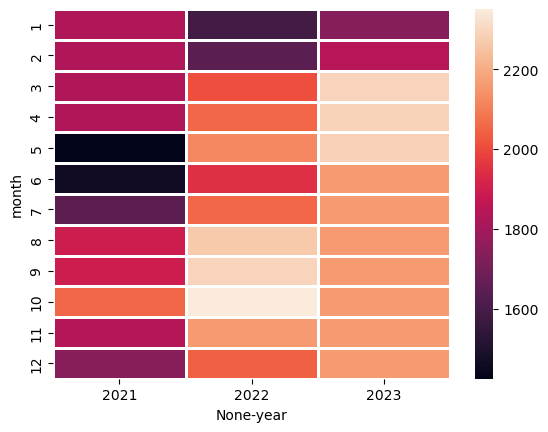

In [1151]:
sns.heatmap(dfPivot,xticklabels=('2021','2022','2023'),linewidths=1)

## Split data frame by year

* For sake of further data analysis and exploration for fellows Data Scientists Data is broken down by year

## 2021

In [1058]:
df_couriers_2021 = df_couriers[df_couriers['year']==2021]
df_couriers_2021.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
0,2021-05-01,49,18.27,0.57,0.0,2021,5,5,Sat
2,2021-05-03,40,16.88,0.60,0.0,2021,5,0,Mon
3,2021-05-04,51,21.88,0.53,0.0,2021,5,1,Tue
4,2021-05-05,50,21.11,0.54,0.0,2021,5,2,Wed
5,2021-05-06,47,19.04,0.56,0.0,2021,5,3,Thu


In [1045]:
df_couriers_2021['month'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [30]:
df_couriers_2021.iloc[:, 1:5].describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,243.000000,232.000000,243.000000,240.000000
mean,57.440329,19.985862,0.622757,0.941125
std,8.478920,8.624381,0.149788,1.934483
min,34.000000,-3.000000,0.440000,0.000000
25%,51.000000,13.965000,0.500000,0.000000
50%,58.000000,19.215000,0.580000,0.000000
75%,64.000000,26.860000,0.685000,0.822500
max,80.000000,37.260000,1.000000,12.450000


## 2022

In [1158]:
df_couriers_2022 = df_couriers[df_couriers['year']==2022]
df_couriers_2022.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
245,2022-01-01,43,-5.95,0.91,0.83,2022,1,5,Sat
246,2022-01-02,50,-4.19,0.97,1.09,2022,1,6,Sun
247,2022-01-03,53,-2.52,0.99,2.93,2022,1,0,Mon
248,2022-01-04,51,-4.79,0.94,3.95,2022,1,1,Tue
249,2022-01-05,61,1.87,0.96,0.92,2022,1,2,Wed


In [1156]:
df_couriers_2022.iloc[:, 1:5].describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,363.000000,352.000000,363.000000,362.000000
mean,67.617080,17.554574,0.653829,0.780387
std,8.010313,10.197770,0.176535,1.399153
min,43.000000,-8.720000,0.430000,0.000000
25%,63.000000,10.372500,0.510000,0.000000
50%,68.000000,18.920000,0.590000,0.000000
75%,73.000000,24.430000,0.815000,0.905000
max,86.000000,37.950000,0.990000,10.490000


In [1162]:
dfPivot2022 = df_couriers_2022.pivot_table(index=['month'], columns=['year'], values=['courier_partners_online'], aggfunc='sum') 
dfPivot2022.head(12)

,courier_partners_online
year,2022
month,
1,1590
2,1643
3,2010
4,2055
5,2121
6,1949
7,2057
8,2270


<Axes: xlabel='None-year', ylabel='month'>

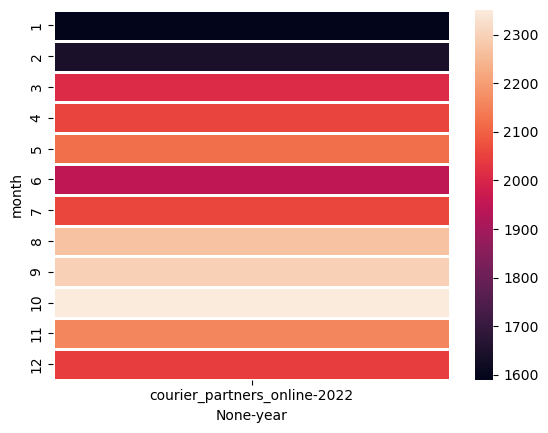

In [1164]:
sns.heatmap(dfPivot2022,xticklabels=2022,linewidths=1)

## 2023

In [1061]:
df_couriers_2023 = df_couriers[df_couriers['year']==2023]
df_couriers_2022.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
245,2022-01-01,43,-5.95,0.91,0.83,2022,1,5,Sat
246,2022-01-02,50,-4.19,0.97,1.09,2022,1,6,Sun
247,2022-01-03,53,-2.52,0.99,2.93,2022,1,0,Mon
248,2022-01-04,51,-4.79,0.94,3.95,2022,1,1,Tue
249,2022-01-05,61,1.87,0.96,0.92,2022,1,2,Wed


In [1048]:
df_couriers_2023['month'].unique()

array([1, 2, 3, 4, 5], dtype=int64)

In [34]:
df_couriers_2023.iloc[:, 1:5].describe()

,courier_partners_online,temperature,relative_humidity,precipitation
count,150.000000,143.000000,150.000000,149.000000
mean,69.706667,13.666573,0.700067,1.217987
std,8.335697,10.254485,0.181347,2.156285
min,47.000000,-9.980000,0.480000,0.000000
25%,65.000000,5.855000,0.550000,0.000000
50%,70.000000,17.310000,0.615000,0.480000
75%,76.000000,21.775000,0.907500,1.110000
max,86.000000,29.820000,1.000000,12.900000


# Linear regression
* Firt model I'm going to use is Linear regression. The value we are trying to predict is a continuous value courier_partners_online and Linear Regression could be a reasonable choice in this case. As estimators I will use MAE/MSE and will check Residuals distribution on plot.



## Dummy variables
* After many iterations and modifications of the model during the working process, I came to the conclusion that transforming year column to dummy variable has a positive impact on model performance.

In [1165]:
year_dummy = pd.get_dummies(df_couriers['year'],drop_first=True,dtype=int)
#drop_first=True- so one column is not a perfect predictor

In [1166]:
df_couriers = pd.concat([df_couriers,year_dummy],axis=1)

In [1167]:
df_couriers.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week,2022,2023
0,2021-05-01,49,18.27,0.57,0.0,2021,5,5,Sat,0,0
2,2021-05-03,40,16.88,0.60,0.0,2021,5,0,Mon,0,0
3,2021-05-04,51,21.88,0.53,0.0,2021,5,1,Tue,0,0
4,2021-05-05,50,21.11,0.54,0.0,2021,5,2,Wed,0,0
5,2021-05-06,47,19.04,0.56,0.0,2021,5,3,Thu,0,0


In [1170]:
df_couriers['2023'] = df_couriers[2023]

In [1171]:
df_couriers['2022'] = df_couriers[2022]

### Dropping features we won't need

In [1172]:
df_couriers.drop([2022],axis=1,inplace=True)

In [1173]:
df_couriers.drop([2023],axis=1,inplace=True)

In [1174]:
df_couriers.drop(['date'],axis=1,inplace=True)

In [1175]:
df_couriers.drop(['year'],axis=1,inplace=True)

In [1176]:
df_couriers.drop(['Day of Week'],axis=1,inplace=True)

In [1177]:
df_couriers.dropna(inplace=True)

<Axes: >

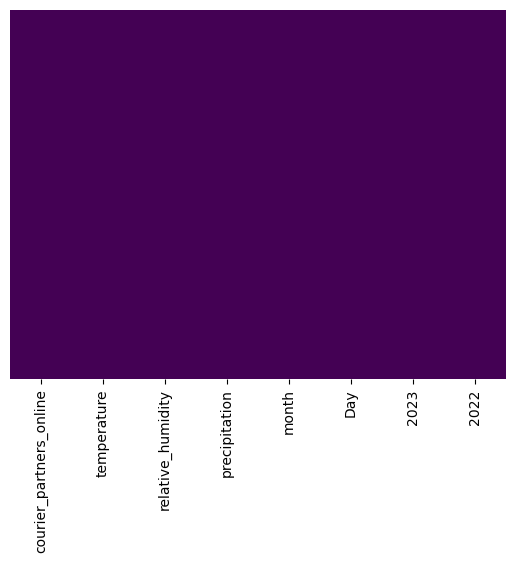

In [1178]:
sns.heatmap(df_couriers.isnull(), yticklabels= False, cbar=False, cmap='viridis') 
# Hooray no missing values

In [1179]:
df_couriers.head()

,courier_partners_online,temperature,relative_humidity,precipitation,month,Day,2023,2022
0,49,18.27,0.57,0.0,5,5,0,0
2,40,16.88,0.60,0.0,5,0,0,0
3,51,21.88,0.53,0.0,5,1,0,0
4,50,21.11,0.54,0.0,5,2,0,0
5,47,19.04,0.56,0.0,5,3,0,0


# Linear regression model
### Setting X, y variable, split train and test set

In [1184]:
X=df_couriers.drop('courier_partners_online', axis=1)
y=df_couriers['courier_partners_online']

In [1185]:
from sklearn.model_selection import train_test_split

In [1186]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [1187]:
from sklearn.linear_model import LinearRegression

In [1188]:
lm= LinearRegression()  

In [1189]:
lm.fit(X_train, y_train)

LinearRegression()

In [1191]:
lm.coef_ 


array([ 0.5458215 ,  4.89912199, -0.84834742,  0.96693573, -0.96446499,
       20.85083274, 13.24091245])

* Checking out model's coefficients. Each of these coefficients relates to the columns in x train.
* Worth to notice year columns have a quite extreme, which is not necessarily bad, probably due to year column limitation I stressed about above. (* Year 2021 represents data only from May-Dec; * Year 2023 represents data only from Jan-May)
* Relative humidity also has a relatively high impact on the model, which on another hand logical, let's see model's performance below

In [1193]:
X_train.columns

Index(['temperature', 'relative_humidity', 'precipitation', 'month', 'Day',
       '2023', '2022'],
      dtype='object')

In [1194]:
X_train.head()

,temperature,relative_humidity,precipitation,month,Day,2023,2022
507,30.09,0.47,0.00,9,1,0,1
185,17.64,0.76,0.58,11,1,0,0
370,19.47,0.65,0.42,5,4,0,1
155,31.04,0.46,0.00,10,6,0,0
709,23.48,0.51,0.00,4,0,1,0


In [1195]:
cdf= pd.DataFrame(lm.coef_, X_train.columns, columns=['Coef'])  


In [1198]:
cdf.head(7)

,Coef
temperature,0.545822
relative_humidity,4.899122
precipitation,-0.848347
month,0.966936
Day,-0.964465
2023,20.850833
2022,13.240912


**Interpreting the coefficients:**
* - Holding all other features fixed, a 1 unit increase in (temperature, humidity, precipitation, month, day) is associated with an **increase/decrease of the valuer of coef** to our target variable Courier Partners Online
* - For year columns we can interpret this as Holding all other features fixed, change of year is associated with an **increase/decrease of the valuer of coef** to our target variable

## Grab predictions

In [1203]:
predictions = lm.predict(X_test) 
#Here I test already trained model to foresee the number of couriers online on the test Set

In [1208]:
predictions.mean() #Predictions comes in form of NumPy arrays

64.34403903244703

* Predictions contains the predicted number of couriers online.
* y_test contains the correct number of couriers online
* Now I can check how far off are the predictions from the actual figures.

<Axes: xlabel='courier_partners_online'>

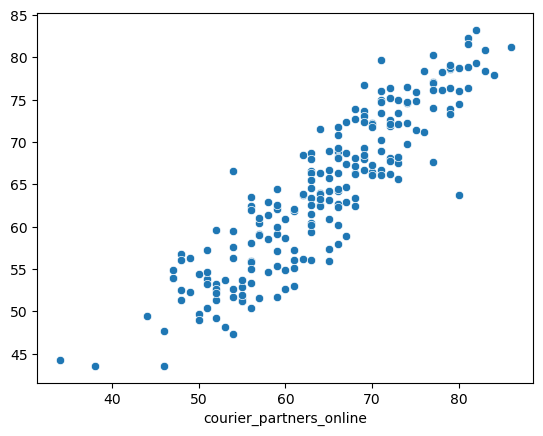

In [1209]:
sns.scatterplot(x=y_test,y=predictions) 


* Here I plot Predictions against actual values, and to the shape of this plot I can conclude the model is doing pretty well, not ideal but still good enogh. Now I'm goid to check the shape of residuals(errors) and some metrics.

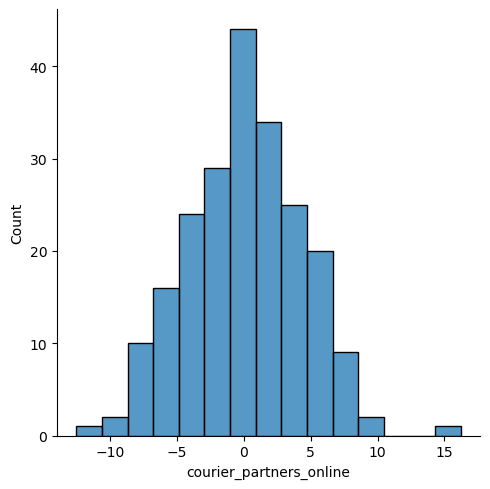

In [1215]:
sns.displot((y_test-predictions)); #here we check our residuals

* Looks good either, it's a good sign that I have normally distributed residuals.It means the model was a correct good choice for the data. Let's check some metrics.


In [1216]:
from sklearn import metrics

In [1218]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.382242328250288
MSE: 18.049129122200274
RMSE: 4.248426664331194


- Well **MAE** here is the easiest to understand, because it's the average error, in other words, with this model I'm approximately 3.38 couriers off the actual number of couriers.
- **MSE** It's said is more popular than MAE, because MSE "punishes" larger errors. Here I don't have quite an extreme values in the dataset, still here is the metric.
- **RMSE** As MSE, RMSE is also interpretable in the "y" units. So, according to this metric I'm approximately 4.24 couriers off the actual number of couriers

**Well the LinearRegression was quite a good choice, but was it the best?) Let's find out with the Sequantial Neural Network model**

# Neural network Sequential model Keras

## Import Libraries

In [1220]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## Dummy variables
Let's strat off from the beginning here is our dataset with no outliers and engineered columns

In [1221]:
df_couriers = df[df['courier_partners_online'] <= 100] # Eliminating outliers
df_couriers

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week
0,2021-05-01,49,18.27,0.57,0.00,2021,5,5,Sat
2,2021-05-03,40,16.88,0.60,0.00,2021,5,0,Mon
3,2021-05-04,51,21.88,0.53,0.00,2021,5,1,Tue
4,2021-05-05,50,21.11,0.54,0.00,2021,5,2,Wed
5,2021-05-06,47,19.04,0.56,0.00,2021,5,3,Thu
...,...,...,...,...,...,...,...,...,...
756,2023-05-27,70,19.22,0.56,0.00,2023,5,5,Sat
757,2023-05-28,76,27.26,0.64,0.41,2023,5,6,Sun
758,2023-05-29,73,NaN,0.62,0.80,2023,5,0,Mon
759,2023-05-30,81,18.35,0.57,0.00,2023,5,1,Tue


In [1222]:
year_dummy = pd.get_dummies(df_couriers['year'],drop_first=True,dtype=int)


In [1223]:
df_couriers = pd.concat([df_couriers,year_dummy],axis=1)

In [1224]:
df_couriers.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week,2022,2023
0,2021-05-01,49,18.27,0.57,0.0,2021,5,5,Sat,0,0
2,2021-05-03,40,16.88,0.60,0.0,2021,5,0,Mon,0,0
3,2021-05-04,51,21.88,0.53,0.0,2021,5,1,Tue,0,0
4,2021-05-05,50,21.11,0.54,0.0,2021,5,2,Wed,0,0
5,2021-05-06,47,19.04,0.56,0.0,2021,5,3,Thu,0,0


In [1225]:
df_couriers['2023'] = df_couriers[2023]

In [1226]:
df_couriers['2022'] = df_couriers[2022]

In [1227]:
df_couriers.drop([2022],axis=1,inplace=True)

In [1228]:
df_couriers.drop([2023],axis=1,inplace=True)

In [1229]:
df_couriers.head()

,date,courier_partners_online,temperature,relative_humidity,precipitation,year,month,Day,Day of Week,2023,2022
0,2021-05-01,49,18.27,0.57,0.0,2021,5,5,Sat,0,0
2,2021-05-03,40,16.88,0.60,0.0,2021,5,0,Mon,0,0
3,2021-05-04,51,21.88,0.53,0.0,2021,5,1,Tue,0,0
4,2021-05-05,50,21.11,0.54,0.0,2021,5,2,Wed,0,0
5,2021-05-06,47,19.04,0.56,0.0,2021,5,3,Thu,0,0


In [1230]:
df_couriers.drop(['date'],axis=1,inplace=True)

In [1231]:
df_couriers.drop(['year'],axis=1,inplace=True)

In [1232]:
df_couriers.drop(['Day of Week'],axis=1,inplace=True)

In [1233]:
df_couriers.dropna(inplace=True)

<Axes: >

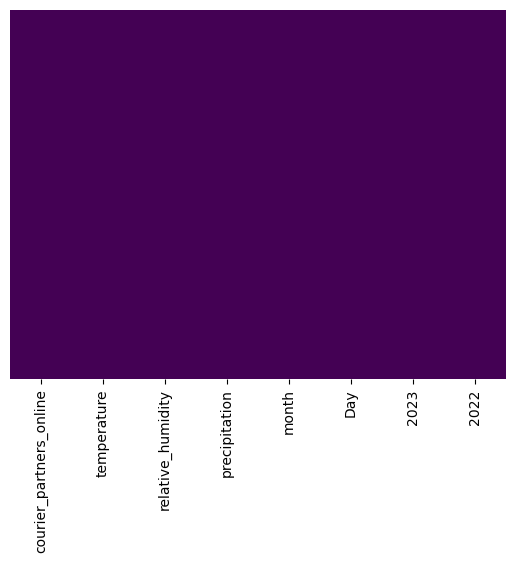

In [1236]:
sns.heatmap(df_couriers.isnull(), yticklabels= False, cbar=False, cmap='viridis') 
# Hooray no missing values

In [1254]:
df_couriers

,courier_partners_online,temperature,relative_humidity,precipitation,month,Day,2023,2022
0,49,18.27,0.57,0.00,5,5,0,0
2,40,16.88,0.60,0.00,5,0,0,0
3,51,21.88,0.53,0.00,5,1,0,0
4,50,21.11,0.54,0.00,5,2,0,0
5,47,19.04,0.56,0.00,5,3,0,0
...,...,...,...,...,...,...,...,...
755,68,19.85,0.55,0.00,5,4,1,0
756,70,19.22,0.56,0.00,5,5,1,0
757,76,27.26,0.64,0.41,5,6,1,0
759,81,18.35,0.57,0.00,5,1,1,0


## Train test split

In [1255]:
X=df_couriers.drop('courier_partners_online', axis=1).values
y=df_couriers['courier_partners_online'].values
# Here we use .values, because of the way TensorFlow works, I have to pass in NumPy arrays 

In [1256]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Scaling

* Data normalization e.g. scaling is quite typical for neural networks, because the layers in neural network contains weits and biases, so just need to take care about some large values in our feature set that could cause inaccuracies and errors.

In [1257]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [1258]:
X_train = scaler.fit_transform(X_train)

In [1259]:
X_test = scaler.transform(X_test)

In [ ]:
#Rule of thumb, to avoid data leakage we fit only train data

## Sequential model

In [1260]:
X_train.shape

(505, 7)

In [1261]:
X_test.shape

(217, 7)

In [1266]:
model = Sequential()

model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

 * Optimizer and loss type is due to type of problem we are about to solve
 * Here we created 7 layers with the one final layer (no dropout layers or early stopping so far, first have to check how the model behaves.)
 * With this particular dataset the target variable is a single numerical 'number of couriers online' value. So  I want my very last layer to be dense(1) because of a need for single neuron that produces some sort of number of couriers. 

In [1267]:
model.fit(x= X_train,y=y_train, validation_data=(X_test,y_test),epochs=600)

Epoch 1/600
16/16 [==============================] - 1s 8ms/step - loss: 4300.9434 - val_loss: 4239.1470
Epoch 2/600
16/16 [==============================] - 0s 3ms/step - loss: 4293.6865 - val_loss: 4230.4688
Epoch 3/600
16/16 [==============================] - 0s 2ms/step - loss: 4282.6807 - val_loss: 4216.2007
Epoch 4/600
16/16 [==============================] - 0s 3ms/step - loss: 4263.4580 - val_loss: 4189.5723
Epoch 5/600
16/16 [==============================] - 0s 3ms/step - loss: 4226.6401 - val_loss: 4137.5967
Epoch 6/600
16/16 [==============================] - 0s 3ms/step - loss: 4154.2847 - val_loss: 4037.6204
Epoch 7/600
16/16 [==============================] - 0s 2ms/step - loss: 4016.7124 - val_loss: 3848.9866
Epoch 8/600
16/16 [==============================] - 0s 4ms/step - loss: 3758.0891 - val_loss: 3499.1575
Epoch 9/600
16/16 [==============================] - 0s 4ms/step - loss: 3287.2820 - val_loss: 2877.1206
Epoch 10/600
16/16 [==============================] - 0

ON X and Y, here I pass also the **validation data.**

So I can keep a tracking of how model is performing not just the training data but also on the test data, for example in case of model overfitting

In [1268]:
losses = pd.DataFrame(model.history.history) 

* Basically loss indicates MSE on the training set, val_loss on validation test_set, why MSE because I choose it in model.compile

<Axes: >

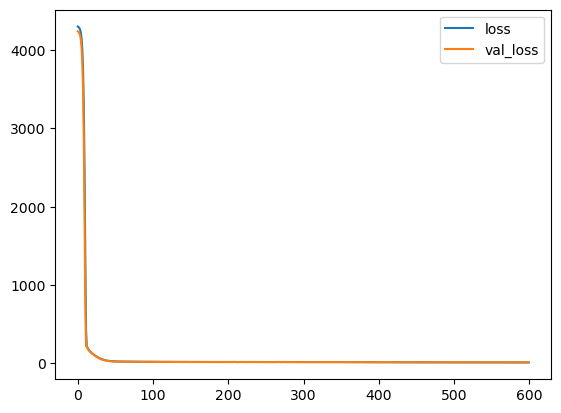

In [1269]:
losses.plot() 
# Here I plot training loss VS validation loss.
# All in all I need it to make sure there is decrease both in training and validation loss.
# There is no spike in orange line, meaning the model has no overfitting, there is no larger errors on validation data

* Here I plot training loss VS validation loss. All in all I need it to make sure there is decrease both in training and validation loss.

* I see no spike in orange line, meaning the model has no overfitting, there is no larger errors on validation data.

# Evaluation on Test Data


In [1270]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score

In [1271]:
predictions = model.predict(X_test)

7/7 [==============================] - 0s 2ms/step


In [1290]:
print('MAE:',mean_absolute_error(y_test,predictions))

MAE: 2.854842260685934


In [1291]:
print('MAE:',mean_squared_error(y_test,predictions))

MAE: 13.252602085134246


* MAE is easiest to explain, because it's pretty straight forward, so here I'm approximately 2.85 couriers off the actual number of couriers.
* Just to recall here with Linear model MAE was higher 3.38

In [1282]:
print('Explained Varince Score:',explained_variance_score(y_test,predictions))

Explained Varince Score: 0.8613812479423525


* Best possible value here is 1.0, Variance score tells how much of variance model was able to explain.
* In my case the model was able to explain around 86% of variences, which is pretty good.

* Another possible way to Estimate model performance is to plot predictions against actual y_test

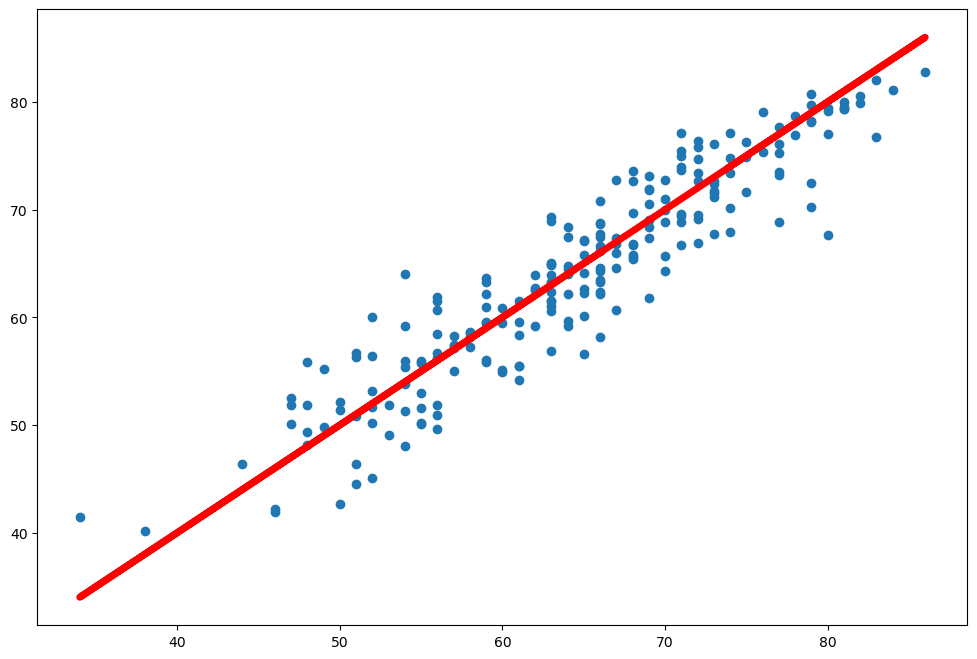

In [1285]:
#Predictions
plt.figure(figsize=(12,8))
plt.scatter(y_test,predictions)

# Perfect predictions
plt.plot(y_test,y_test,'r',linewidth=5)

* Well, the Predicted values aligns pretty good to the "Perfect predictions".
* I can see some problem with minimum predicted values, maybe those days with minimum couriers online do not have enough representation in the dataset. 
* Probably it worth to retrain model with more data, as we remember there was some limitations with year column: (* Year 2021 represents data only from May-Dec; * Year 2023 represents data only from Jan-May)

### Check model's Residuals

In [1286]:
predictions.shape

(217, 1)

In [1287]:
y_test.shape

(217,)

In [1288]:
errors = y_test.reshape(217, 1) - predictions

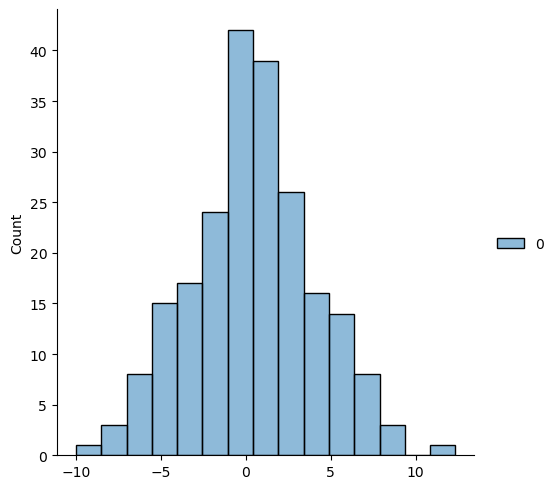

In [1292]:
sns.displot(errors)

* Residuals are normally distributed, which means the model was a good choice for the data. 

#### Conclusion

* The Sequantial neural network model proved to be more advantageous in terms of following metrice **MAE: 2.85 vs 3.38**, **MSE: 13.25 vs 18.05**
* I was able to prove model performance with a decent result for **Explained varience score-  0.86**
* Using validation set on model fitting, model proves there is no data overfitting and data aligns properly to the model.
* Residual plot looks a bit better

* **It's recommended to retrain model with higher data variance among lower couriers' number values.**
* **Probably it worth to split couriers in quartiles lower 25%, median 50%, top 75% and check model's output for each quartiles.**

## Saving model

In [1293]:
from tensorflow.keras.models import load_model

In [1294]:
model.save('model_couriers_online.keras')